In [1]:
def eval2(tr,dataloader_dict,labels):
    model=tr.model
    acc=0
    count=0.0
    for inputs,la in dataloader_dict["train"]:
        
        model.eval()
        #print(inputs.shape)
        #貼り付け
        plt.imshow(inputs[0][0].to('cpu').detach().numpy().copy().T)
        #表示
        plt.show()
        output = model(inputs)
        for h in range(len(output)):
            #print("模範解答",labels[la[h].item()])
            ans=[[i,output[h][i].item()] for i in range(len(labels))]
            ans.sort(key=lambda x: x[1],reverse=True)
            acc+=1 if (ans[0][0]==la[h])else 0
            count+=1
            #[print("{:7}:{:.5f}".format(ans[i][0],ans[i][1])) for i in range(len(ans))]
            #print("----------------")
    print("正解数/入力数:{}/{:.0f}".format(acc,count))
    print("正解率:{:.3f}".format(acc/count))
#eval(mymodel,dataloader_dict,labels)        
eval2(mymodel,dataloader_dict,labels)

NameError: name 'mymodel' is not defined

In [1]:
from mylibs.dataloader_dict import *
from mylibs.trainer import *
import torch
import torch.nn as nn
import os
import torch.utils.data as data
from importlib import import_module
import matplotlib.pyplot as plt
import torch.optim as optim
import copy

vggish_input=import_module(".torchvggish.vggish_input","torchvggish-master_changed")
use_pretrained = True

#GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

vggish/embedding:0
vggish/embedding:0
Using cuda device


In [2]:
labels=["Car","Siren","Music","Animal","Speech"]

dataloader_dict=get_dataloader_dict(classes=["Car","Siren","other_MusicAnimalSpeech"],datatype="267_trainMusicAnimalSpeech",num_data=5)


C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\177_train177AnimalCarMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\177_trainMusicAnimalSpeech177CarSirenother_MusicAnimalSpeech.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\267_trainMusicAnimalSpeech267CarSirenother_MusicAnimalSpeech.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\267_trainMusicAnimalSpeech5AnimalCarMusicSirenSpeech.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\267_trainMusicAnimalSpeech5CarSirenother_MusicAnimalSpeech.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\oikomi_train500CarSirenSpeechother_MusicAnimal.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\oikomi_trainMusicAnimalSpeech500CarSirenother_Mus

vggish/embedding:0


C:\Users\hase\git\MyVggishLearning\mylibs\trainer.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()


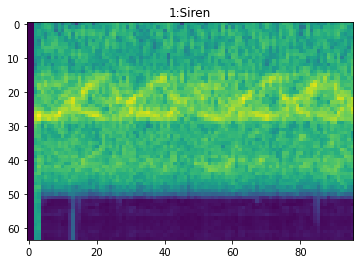

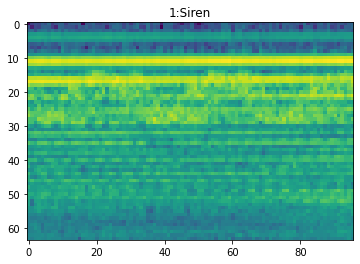

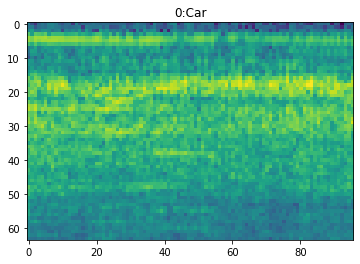

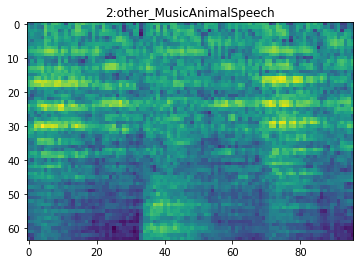

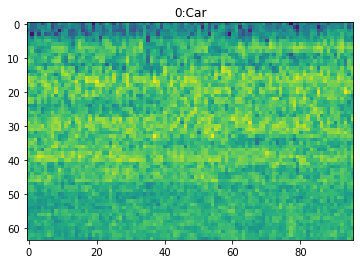

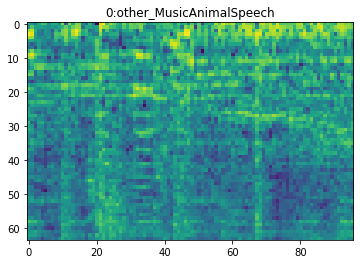

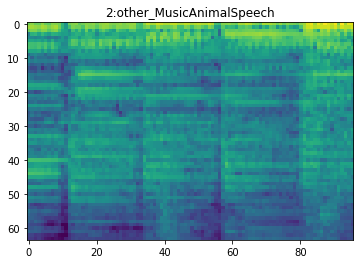

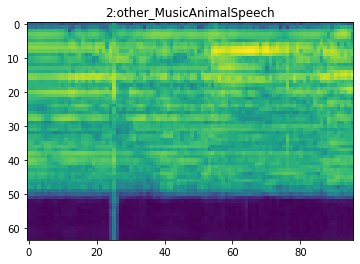

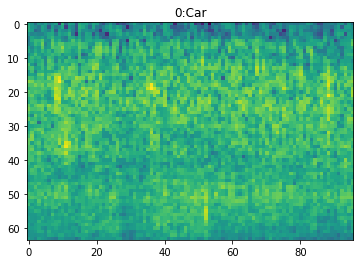

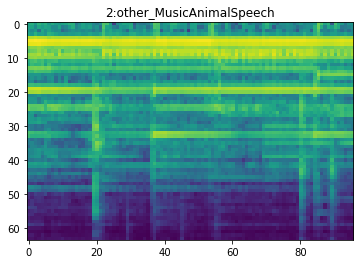

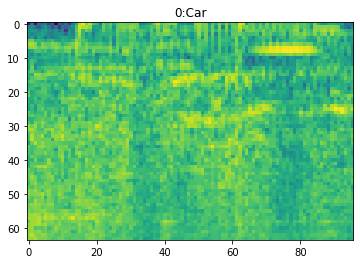

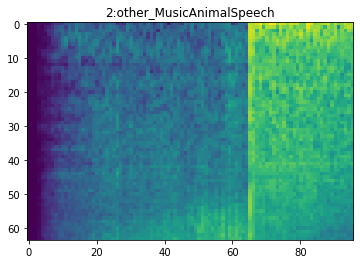

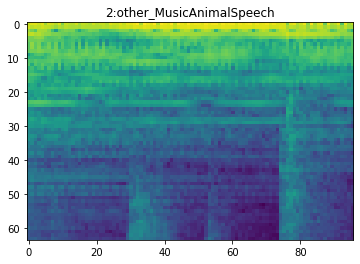

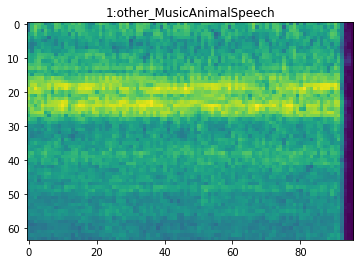

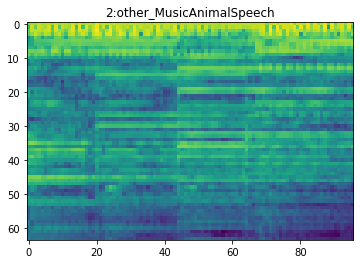

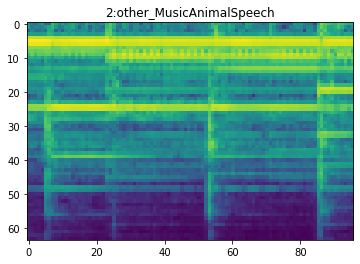

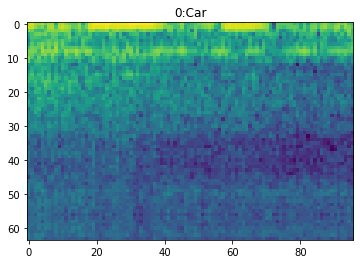

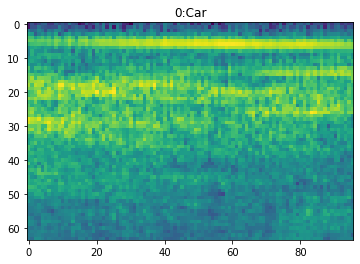

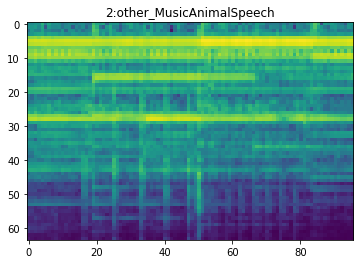

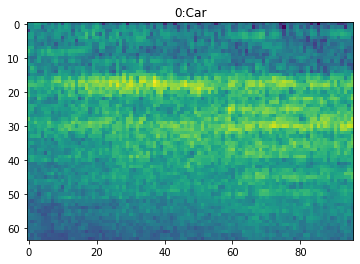

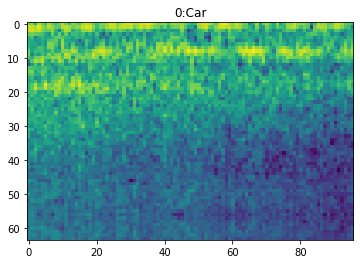

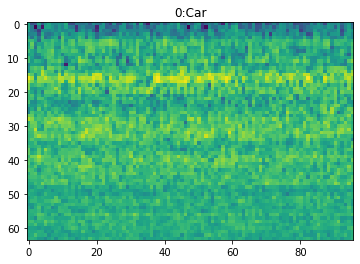

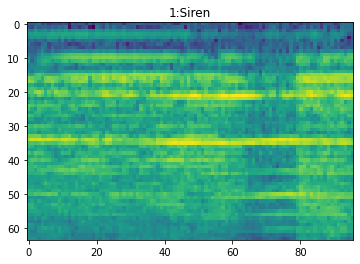

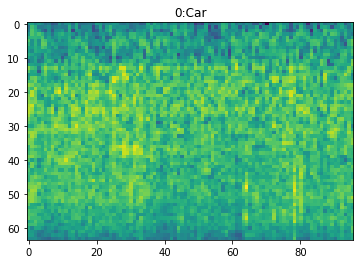

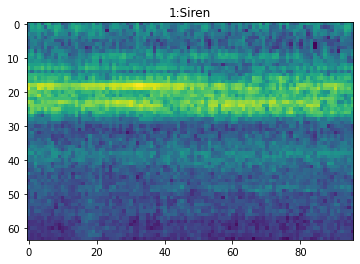

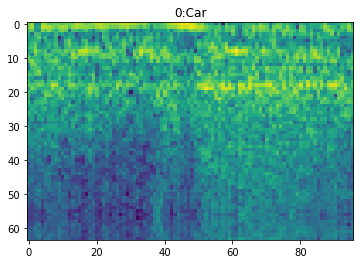

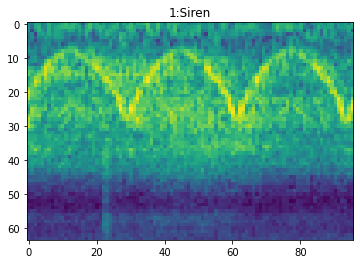

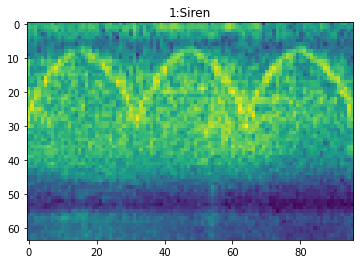

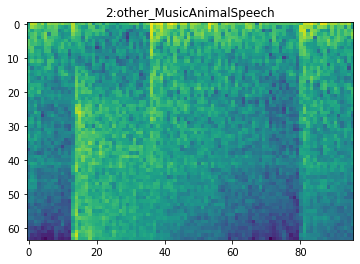

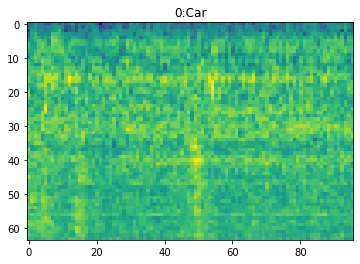

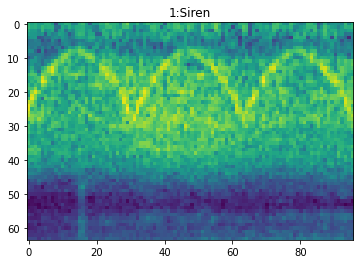

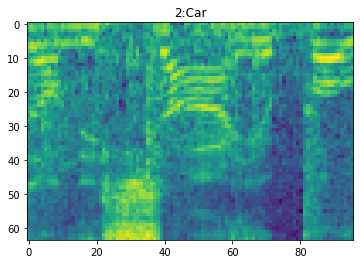

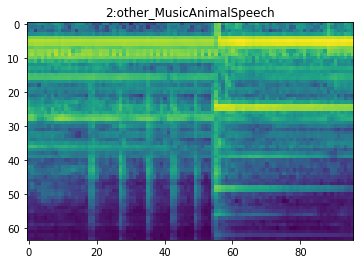

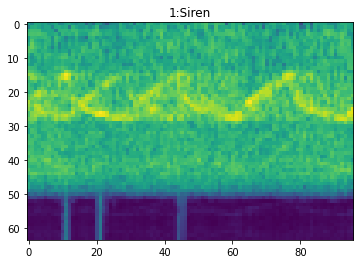

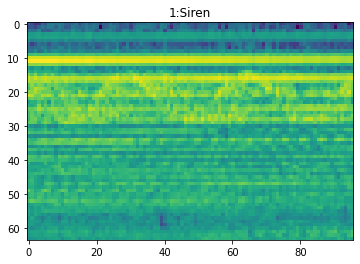

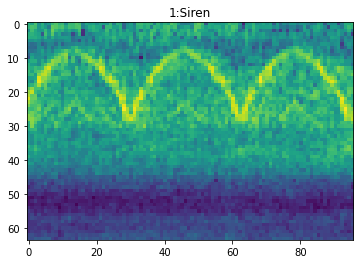

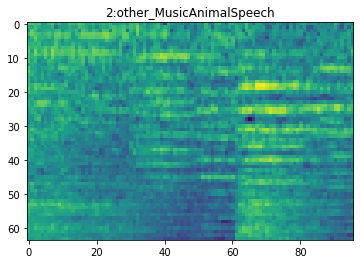

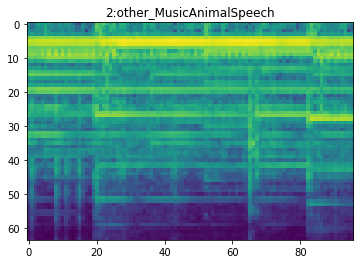

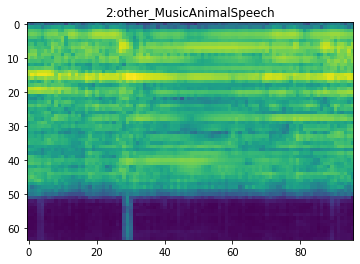

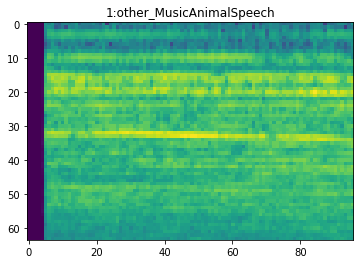

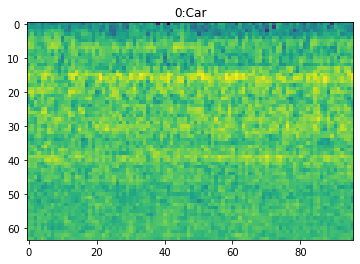

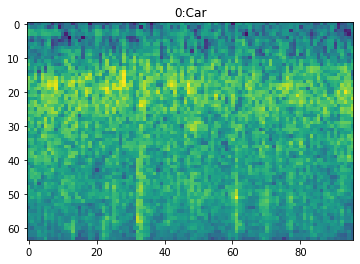

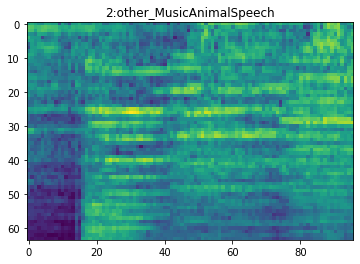

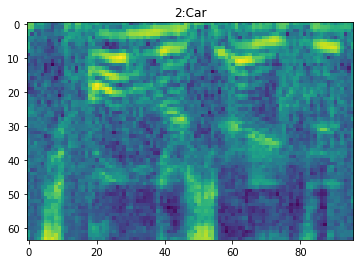

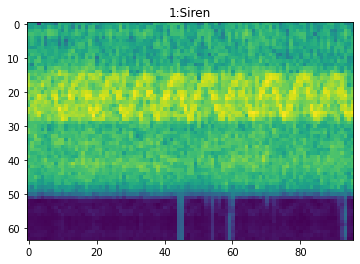

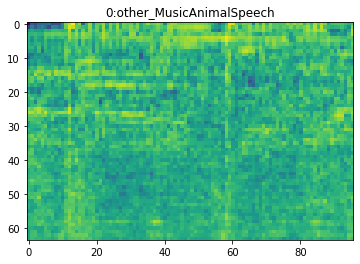

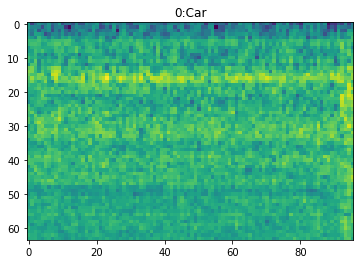

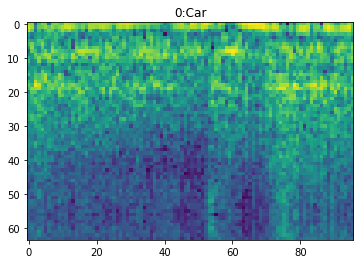

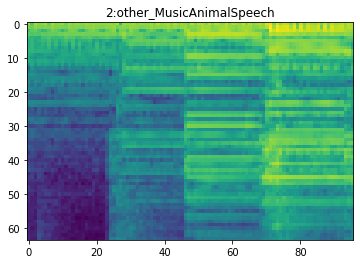

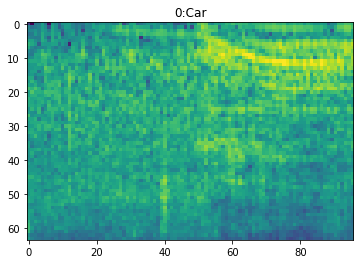

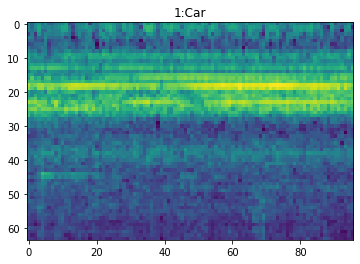

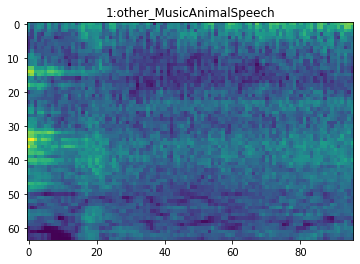

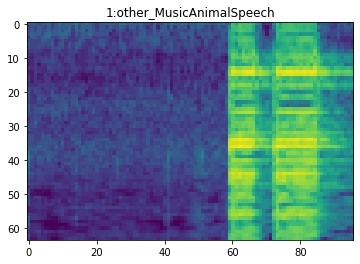

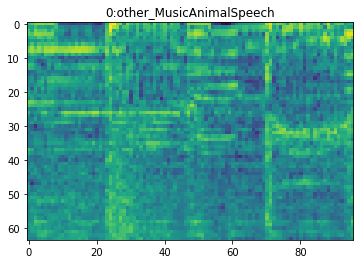

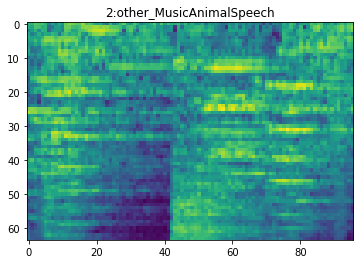

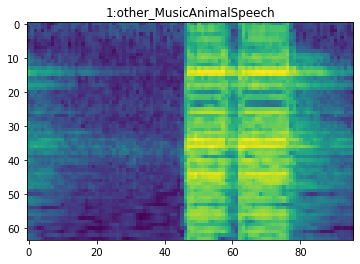

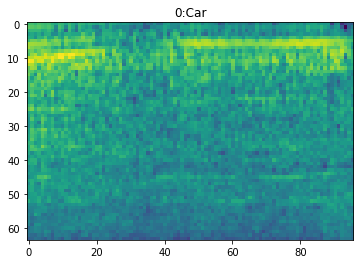

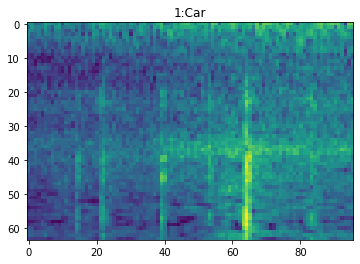

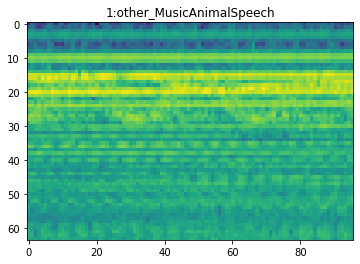

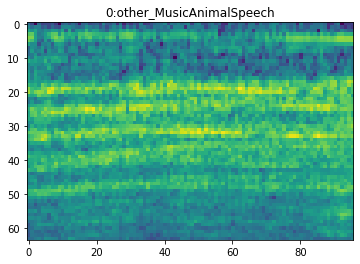

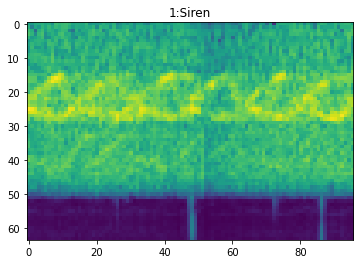

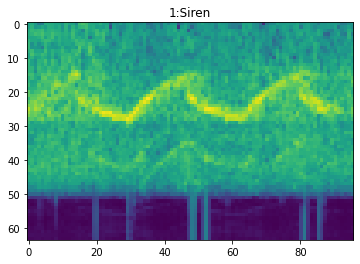

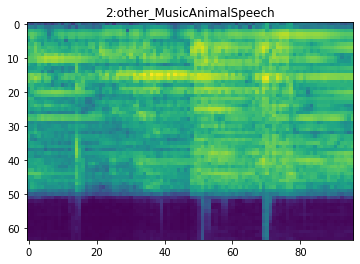

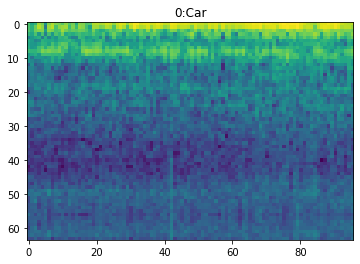

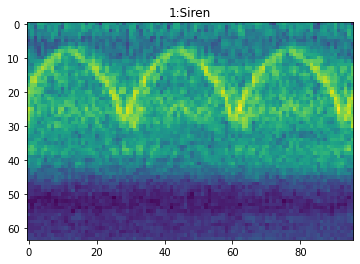

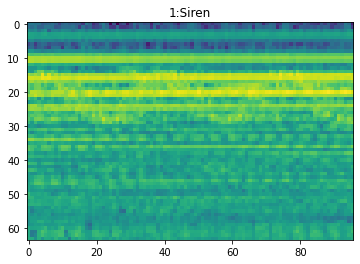

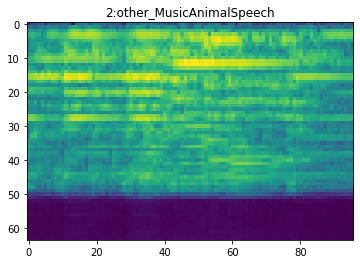

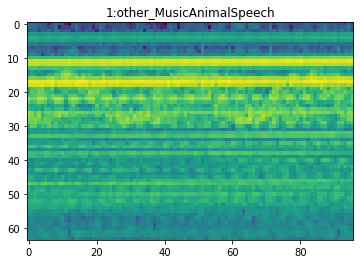

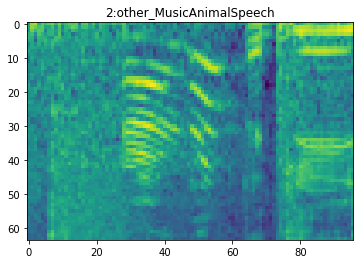

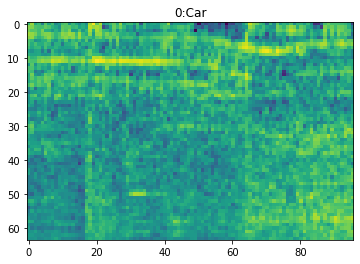

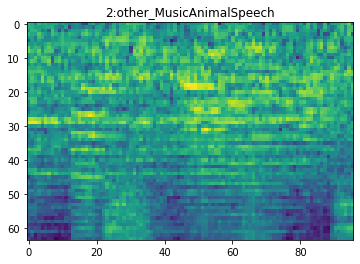

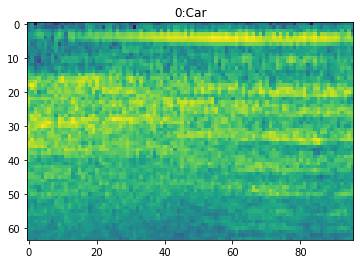

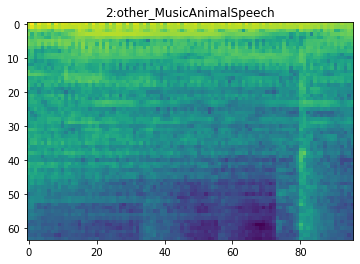

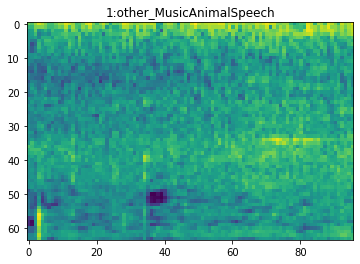

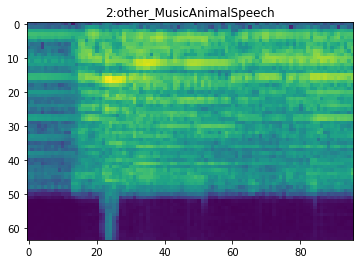

In [3]:
trainer=trainer(_labels=["Car","Siren","other_MusicAnimalSpeech"],_lr=0.01
                ,_classfilter=nn.Sequential(
                            nn.Linear(128,64),
                            nn.Dropout(p=0.5),
                            nn.Sigmoid(),
                            nn.Linear(64,3),
                            nn.Softmax(dim=1)
                            ))
trainer.loadModel("267otherMusicAnimalSpeech")
trainer.eval(dataloader_dict,"2")



In [ ]:
from pathlib import Path
'''

DIR=Path().resolve()
count=0
os.makedirs(os.path.join(DIR,"acc"),exist_ok=True)
os.makedirs(os.path.join(DIR,"bat"),exist_ok=True)
for inputs,la in dataloader_dict["train"]:
    for i in range(len(inputs)):
        fig=plt.figure()
        plt.imshow(inputs[i][0].to('cpu').detach().numpy().copy().T)
        plt.title(labels[int(la[i])])
        isans='acc' if labels[int(la[i])]== "Car" else 'bat'
        filepath=os.path.join(DIR,isans,str(count)+".png")
        count+=1
        fig.savefig(filepath)
        '''


In [32]:
outputs=trainer.model(torch.randn([10,1,96,64]))
print(outputs)
a=torch.max(outputs, 1)
int(a[1][8])
int(torch.max(outputs, 1)[1][8])

tensor([[0.1193, 0.1464, 0.7343],
        [0.1112, 0.1416, 0.7472],
        [0.1276, 0.1250, 0.7474],
        [0.1211, 0.1759, 0.7029],
        [0.1416, 0.1635, 0.6949],
        [0.1356, 0.1495, 0.7148],
        [0.1111, 0.1740, 0.7148],
        [0.0997, 0.1432, 0.7571],
        [0.1102, 0.1724, 0.7174],
        [0.1146, 0.1598, 0.7257]], device='cuda:0', grad_fn=<SoftmaxBackward>)


2

In [15]:
trainer.model

VGGish(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False

In [22]:
for i in dataloader_dict["train"]:
    print(i[0].size())

torch.Size([10, 1, 96, 64])
torch.Size([10, 1, 96, 64])
torch.Size([10, 1, 96, 64])
torch.Size([10, 1, 96, 64])
torch.Size([10, 1, 96, 64])
torch.Size([10, 1, 96, 64])
torch.Size([10, 1, 96, 64])
torch.Size([5, 1, 96, 64])
